##Gemini-3 responses to Diagram-Essential Questions

In [ ]:
!pip install --upgrade gspread gspread_dataframe
import os
from google.colab import drive
drive.mount('/content/drive')
from google.colab import userdata
GEMINI_API_KEY=userdata.get('LLM_JUDGE')
import google.generativeai as genai
from google.genai.types import ThinkingConfig, ThinkingLevel
from PIL import Image
import json
from google import genai
from google.genai import types
import time
import pickle
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default
from gspread_dataframe import get_as_dataframe
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

###Gemini-3-pro responses code

In [89]:
def gemini_prompt_with_image(prompt,image_path):
  client = genai.Client(api_key=GEMINI_API_KEY)
  with open(image_path, "rb") as f:
    image_bytes = f.read()
  response = client.models.generate_content(
    model="gemini-3-pro-preview",
    contents=[
        types.Part(text=prompt),
        types.Part.from_bytes(data=image_bytes, mime_type="image/png")
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(thinking_level="low"),
        max_output_tokens=5000
    )
)
  return response.text

In [ ]:
chapters = [
  'Chapter_2_Vectors_2',
  'Chapter_5_Newton_laws_of_motion_4',
  'Chapter_6_Applications_of_Newton_Laws_9',
  'Chapter_7_Work_and_Kinetic_Energy_1',
  'Chapter_8_Potential_Energy_and_Conservation_of_energy_3',
  'Chapter_9_Linear_Momentum_and_Collisions_4',
  'Chapter_10_Fixed_Axis_Rotation_6',
  'Chapter_11_Angular_Momentum_2',
  'Chapter_12_Static_Equilibrium_and_Elasticity_10',
  'Chapter_14_Fluid_Mechanics_1',
  'Chapter_17_Sound_2']

In [ ]:
start_time = time.time()
output_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/gemini_answers_diagram_essential_questions_pretty.txt"
base_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Correct_Freq/"
json_output_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/gemini_answers_intermediate.json" # New JSON path
gemini_answers = {}
with open(output_path, "w", encoding="utf-8") as f:
  #chapters = sorted(os.listdir(base_path))
  #chapters = ['Chapter_17_Sound_2','Chapter_2_Vectors_2','Chapter_7_Work_and_Kinetic_Energy_1']
  for chapter in chapters:
    gemini_answers[chapter] = {}
    chapter_path = base_path+chapter
    questions = sorted(os.listdir(chapter_path))
    f.write(f"{chapter}\n")
    f.write("-" * 32 + "\n\n")
    for question in questions:
      question_path = chapter_path+"/"+question
      print(chapter,question)
      prompt = (
      "You are an expert physics professor. "
      "Solve the problem and all sub-parts step-by-step. "
      "For each part: write the key equation then substitute numbers and then compute. "
      "State assumptions if needed. "
      "Round your calculations to 2 decimal places. "
      "Be precise and concise—no extra commentary. "
      "No Latex, give answer in human readable format"
      )
      response = gemini_prompt_with_image(prompt,question_path+"/q.png")
      gemini_answers[chapter][question] = response
      f.write(f"{question}\n")
      f.write("-" * 19 + "\n")
      f.write(response.strip() + "\n\n")
      f.flush()
      with open(json_output_path, "w", encoding="utf-8") as jf:
        json.dump(gemini_answers, jf, indent=4, ensure_ascii=False)

    f.write("\n")


end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nDone! Total execution time: {elapsed_time:.2f} seconds ({elapsed_time/60:.2f} minutes)")




Chapter_2_Vectors_2 37
Chapter_2_Vectors_2 53
Chapter_5_Newton_laws_of_motion_4 39
Chapter_5_Newton_laws_of_motion_4 79
Chapter_5_Newton_laws_of_motion_4 81
Chapter_5_Newton_laws_of_motion_4 87
Chapter_6_Applications_of_Newton_Laws_10 109
Chapter_6_Applications_of_Newton_Laws_10 123
Chapter_6_Applications_of_Newton_Laws_10 125
Chapter_6_Applications_of_Newton_Laws_10 29
Chapter_6_Applications_of_Newton_Laws_10 45
Chapter_6_Applications_of_Newton_Laws_10 51
Chapter_6_Applications_of_Newton_Laws_10 61
Chapter_6_Applications_of_Newton_Laws_10 73
Chapter_6_Applications_of_Newton_Laws_10 93
Chapter_6_Applications_of_Newton_Laws_10 95
Chapter_7_Work_and_Kinetic_Energy_1 101
Chapter_8_Potential_Energy_and_Conservation_of_energy_3 19
Chapter_8_Potential_Energy_and_Conservation_of_energy_3 49
Chapter_8_Potential_Energy_and_Conservation_of_energy_3 83
Chapter_9_Linear_Momentum_and_Collisions_4 118
Chapter_9_Linear_Momentum_and_Collisions_4 53
Chapter_9_Linear_Momentum_and_Collisions_4 55
Chapter

In [ ]:
666/45

14.8

###LLM-as-a-judge

In [ ]:
# judge params: gpt/gemini response (jsons) ; labeled output (google sheet) ; golden answer (image) ; prompt
# Need to check if LLM-as-a-judge is 100% accurate
# Loop through 45 q
# gpt/gemini response (jsons) = key is chapter name + question number
# golden answer = chapter name is folder ; files are question numbers
# labeled output = let's create json with chapter name + question number as key

####gpt/claude response (jsons)

In [ ]:
chapters_keys_gpt_and_claude = {
  '2':'Chapter_2_Vectors_4',
  '5':'Chapter_5_Newton_laws_of_motion_12',
  '6':'Chapter_6_Applications_of_Newton_Laws_18',
  '7':'Chapter_7_Work_and_Kinetic_Energy_5',
  '8':'Chapter_8_Potential_Energy_and_Conservation_of_energy_8',
  '9':'Chapter_9_Linear_Momentum_and_Collisions_11',
  '10':'Chapter_10_Fixed_Axis_Rotation_15',
  '11':'Chapter_11_Angular_Momentum_6',
  '12':'Chapter_12_Static_Equilibrium_and_Elasticity_13',
  '14':'Chapter_14_Fluid_Mechanics_5',
  '17':'Chapter_17_Sound_7'}

chapters_keys_gemini = {
  '2':'Chapter_2_Vectors_2',
  '5':'Chapter_5_Newton_laws_of_motion_4',
  '6':'Chapter_6_Applications_of_Newton_Laws_10',
  '7':'Chapter_7_Work_and_Kinetic_Energy_1',
  '8':'Chapter_8_Potential_Energy_and_Conservation_of_energy_3',
  '9':'Chapter_9_Linear_Momentum_and_Collisions_4',
  '10':'Chapter_10_Fixed_Axis_Rotation_6',
  '11':'Chapter_11_Angular_Momentum_2',
  '12':'Chapter_12_Static_Equilibrium_and_Elasticity_10',
  '14':'Chapter_14_Fluid_Mechanics_1',
  '17':'Chapter_17_Sound_2'}


gpt_5_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/GPT_answers_diagram_based_questions.json"
claude_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/anthropic_answers_diagram_based_questions.json"
gemini_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/gemini_answers_intermediate.json"

with open(gpt_5_path, "r", encoding="utf-8") as f:
  gpt5 = json.load(f)

with open(claude_path, "r", encoding="utf-8") as f:
  claude = json.load(f)

with open(gemini_path, "r", encoding="utf-8") as f:
  gemini_responses = json.load(f)

####Code to create groundtruth labels

In [ ]:
sh = gc.open_by_url("https://docs.google.com/spreadsheets/d/1Q1l4hxWjlCJdX2Q_Yaw_W6S3Ep0-Mpxe7EJWqft6eJ0/")

worksheet = sh.sheet1
data = worksheet.get_all_values()

In [ ]:
data[0]

['Chapter #',
 'Question #',
 'Diagram',
 'Output Result (Right/Wrong) [GPT-5]',
 'Output Result (Right/Wrong) [Sonnet-4.5]',
 'Error Category']

In [ ]:
lbled_output = {}
for i in range(1,len(data)):
  chapter_number,question_number,diagram,gpt_correctness,sonnet_correctness,_ = data[i]
  if diagram == 'Essential':
    if chapter_number not in lbled_output:
      lbled_output[chapter_number] = {}
    lbled_output[chapter_number][question_number] = {
        "gpt":gpt_correctness,
        "sonnet":sonnet_correctness
    }

In [ ]:
output_directory = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets"
output_filename = "lbled_output.pkl"
output_filepath = f"{output_directory}/{output_filename}"

with open(output_filepath, 'wb') as f:
    pickle.dump(lbled_output, f)

print(f"'lbled_output' dictionary saved as '{output_filepath}'")

'lbled_output' dictionary saved as '/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/lbled_output.pkl'


####Load labels

In [ ]:
output_directory = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets"
output_filename = "lbled_output.pkl"
output_filepath = f"{output_directory}/{output_filename}"

with open(output_filepath, 'rb') as f:
    loaded_lbled_output = pickle.load(f)

total_questions = 0
for k in loaded_lbled_output.keys():
  total_questions += len(loaded_lbled_output[k])


print(f"Successfully loaded object from '{output_filepath}'")
print(f"Keys of loaded object: {loaded_lbled_output.keys()}")
print(f"Total questions:  {total_questions}")

Successfully loaded object from '/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/lbled_output.pkl'
Keys of loaded object: dict_keys(['2', '5', '6', '7', '8', '9', '10', '11', '12', '14', '17'])
Total questions:  45


####LLM-as-a-judge Loop


In [ ]:
def LLM_Judge(model_response, image_path):
    client = genai.Client(api_key=GEMINI_API_KEY)

    with open(image_path, "rb") as f:
        image_bytes = f.read()

    system_prompt = """
You are an answer verification system.

Your task is to compare the ground truth answer extracted from the image
with the model answer provided in the JSON and return a binary verdict.

Core Instructions:
1. Extract the ground truth answer exactly as shown in the image.
2. Read the model’s answer from the provided JSON.
3. Compare all subparts (if the question has multiple parts).
4. If even one subpart is incorrect, incomplete, or missing, the verdict MUST be Wrong.
5. Do not infer intent or give partial credit.

Semantic Equivalence Requirement (MANDATORY):
Before deciding Correct or Wrong, you MUST check whether the ground truth
and model answer are semantically equivalent even if expressed in different valid forms.
You MUST normalize both answers into a common canonical representation before comparison.

Acceptable equivalence transformations include (when applicable):
- Vector representations: Cartesian components (ai + bj), magnitude–direction form,
  unit-vector form, or polar vs Cartesian. Convert one representation into the other
  and compare consistently.
- Reference frame differences: If each answer explicitly states a different origin or
  reference point, transform coordinates into the same reference frame before comparison.
- Algebraic equivalence: Simplified vs unsimplified expressions, factored vs expanded forms,
  exact vs approximate values (e.g., sqrt(2) vs 1.414).
- Derived equivalence: If one answer gives magnitude and direction, compute the implied
  components (or vice versa) and compare.

Numeric Tolerance Rule (apply AFTER canonicalization):
- Minor numerical differences caused by rounding or approximation MUST be treated as Correct.
- Use a reasonable tolerance (approximately 1% relative difference or small absolute error),
  unless the problem explicitly requires exact precision.
- Examples of acceptable matches: 5 vs 4.99, 3.28 vs 3.29, 25 vs 24.85.

Disallowed Equivalence:
- Do NOT mark Correct if equivalence would require changing physical assumptions,
  ignoring stated reference frames, flipping axes without justification,
  or inventing unstated transformations.

Output Rules:
1. Output exactly one line.
2. Use the following format verbatim:
   verdict: <Correct|Wrong>, ground_truth: <value>, model_answer: <value>
3. If there are multiple subparts, list them as comma-separated pairs.
4. Only output the final line. Do not include explanations, reasoning, or extra text.

Example:
verdict: Correct, ground_truth: a=3, b=7, model_answer: a=2.98, b=6.99
"""

    response = client.models.generate_content(
        model="gemini-3-pro-preview",
        contents=[
            types.Part(text=model_response),
            types.Part.from_bytes(data=image_bytes, mime_type="image/png")
        ],
        config=types.GenerateContentConfig(
            system_instruction=system_prompt,
            thinking_config=types.ThinkingConfig(thinking_level="HIGH"),
            max_output_tokens=7000
        )
    )

    return response.text

In [ ]:
# golden answer (image) looping with labeled output (google sheet) looping with gpt and sonnet responses (jsons) [DONE]
# Need to check if LLM-as-a-judge is 100% correct [DONE]
# Then get gemini responses checked
none_lis = [['12','71'],['12','77'],['12','79'],['14','89'],['6','61']]
base_path = '/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Correct_Freq/'
for folder_name in sorted(os.listdir(base_path)):
  chapter_path = base_path + folder_name
  for question_number in sorted(os.listdir(chapter_path)):
    chapter_number = folder_name.split('_')[1]
    if [chapter_number,question_number] not in none_lis:
      pass
    else:
      gpt5_response = gpt5[chapters_keys_gpt_and_claude[chapter_number]][question_number]
      sonnet_response = claude[chapters_keys_gpt_and_claude[chapter_number]][question_number]
      print(f"LABELED ANSWER: Chap # {chapter_number} Q # {question_number} {loaded_lbled_output[chapter_number][question_number]}")
      ans_path = chapter_path + '/' + question_number + '/a.png'
      judge_resonse_gpt = LLM_Judge(gpt5_response,ans_path)
      judge_resonse_sonnet = LLM_Judge(sonnet_response,ans_path)
      print(f"LLM JUDGE RESPONSE (GPT): {judge_resonse_gpt}")
      print(f"LLM JUDGE RESPONSE (Sonnet): {judge_resonse_sonnet}")

LABELED ANSWER: Chap # 12 Q # 71 {'gpt': '', 'sonnet': 'Wrong'}
LLM JUDGE RESPONSE (GPT): verdict: Correct, ground_truth: a. corner 66.7 N at 30°, floor 177 N at 109°, b. μ_s = 0.346, model_answer: a. corner 66.67 N (components 57.74 N, 33.33 N), floor components N=166.67 N f=57.74 N, b. μ_s = 0.35
LLM JUDGE RESPONSE (Sonnet): verdict: Wrong, ground_truth: a. corner force = 66.7 N, b. mu_s = 0.346, model_answer: a. corner force = 115.47 N, b. mu_s = 0.70
LABELED ANSWER: Chap # 12 Q # 77 {'gpt': 'Wrong', 'sonnet': ''}
LLM JUDGE RESPONSE (GPT): verdict: Wrong, ground_truth: 42.2°, model_answer: 13.93°
LLM JUDGE RESPONSE (Sonnet): verdict: Correct, ground_truth: \theta = 42.2^\circ, model_answer: \theta = 42.27^\circ
LABELED ANSWER: Chap # 12 Q # 79 {'gpt': 'Wrong', 'sonnet': 'Wrong'}
LLM JUDGE RESPONSE (GPT): None
LLM JUDGE RESPONSE (Sonnet): verdict: Wrong, ground_truth: W(l_1/l_2 - 1), W l_1/l_2 + mg, model_answer: F_1 = Wl_1/l_2, F_2 = W(l_1 + l_2)/l_2 + mg
LABELED ANSWER: Chap # 14 Q

In [ ]:
# LLM Judge is 100% correct with a caveat that sometimes it does not give output due to output token limit
# Then get gemini responses checked
none_lis = []
base_path = '/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Correct_Freq/'
for folder_name in sorted(os.listdir(base_path)):
  chapter_path = base_path + folder_name
  for question_number in sorted(os.listdir(chapter_path)):
    chapter_number = folder_name.split('_')[1]
    gemini_response = gemini_responses[chapters_keys_gemini[chapter_number]][question_number]
    print(f"LABELED ANSWER: Chap # {chapter_number} Q # {question_number} {loaded_lbled_output[chapter_number][question_number]}")
    ans_path = chapter_path + '/' + question_number + '/a.png'
    judge_resonse_gemini = LLM_Judge(gemini_response,ans_path)
    if judge_resonse_gemini is None:
      none_lis.append([chapter_number,question_number])
    print(f"LLM JUDGE RESPONSE (Gemini): {judge_resonse_gemini}")




LABELED ANSWER: Chap # 10 Q # 115 {'gpt': 'Wrong', 'sonnet': 'Wrong'}
LLM JUDGE RESPONSE (Gemini): verdict: Wrong, ground_truth: I = 8.8 kg·m^2, omega = 1.23 rad/s, model_answer: I = 9.33 kg·m^2, omega = 1.22 rad/s
LABELED ANSWER: Chap # 10 Q # 123 {'gpt': 'Wrong', 'sonnet': ''}
LLM JUDGE RESPONSE (Gemini): verdict: Correct, ground_truth: \frac{2}{5} mR^2, model_answer: \frac{2}{5} m R^2
LABELED ANSWER: Chap # 10 Q # 65 {'gpt': '', 'sonnet': ''}
LLM JUDGE RESPONSE (Gemini): verdict: Correct, ground_truth: 7/36 mL^2, model_answer: (7/36)mL^2
LABELED ANSWER: Chap # 10 Q # 75 {'gpt': '', 'sonnet': ''}
LLM JUDGE RESPONSE (Gemini): verdict: Correct, ground_truth: 1.67 kg, model_answer: 1.67 kg
LABELED ANSWER: Chap # 10 Q # 77 {'gpt': 'Wrong', 'sonnet': 'Wrong'}
LLM JUDGE RESPONSE (Gemini): verdict: Correct, ground_truth: τ1 = -9.0 N·m, τ2 = 3.46 N·m, τ3 = 0, τ4 = -3.38 N·m, τ_net = -8.92 N·m, model_answer: τ1 = -9.00 N·m, τ2 = 3.46 N·m, τ3 = 0.00 N·m, τ4 = -3.38 N·m, τ_net = -8.92 N·m
LABEL

In [88]:
# Chap # 10 Q # 115 [JUDGED INCORRECTLY]
# Chap # 12 Q # 81
# Chap # 6 Q # 61
# Chap # 6 Q # 95
# Chap # 7 Q # 101
# Chap # 9 Q # 118

###Interventions

#### Chap 12 Q 81

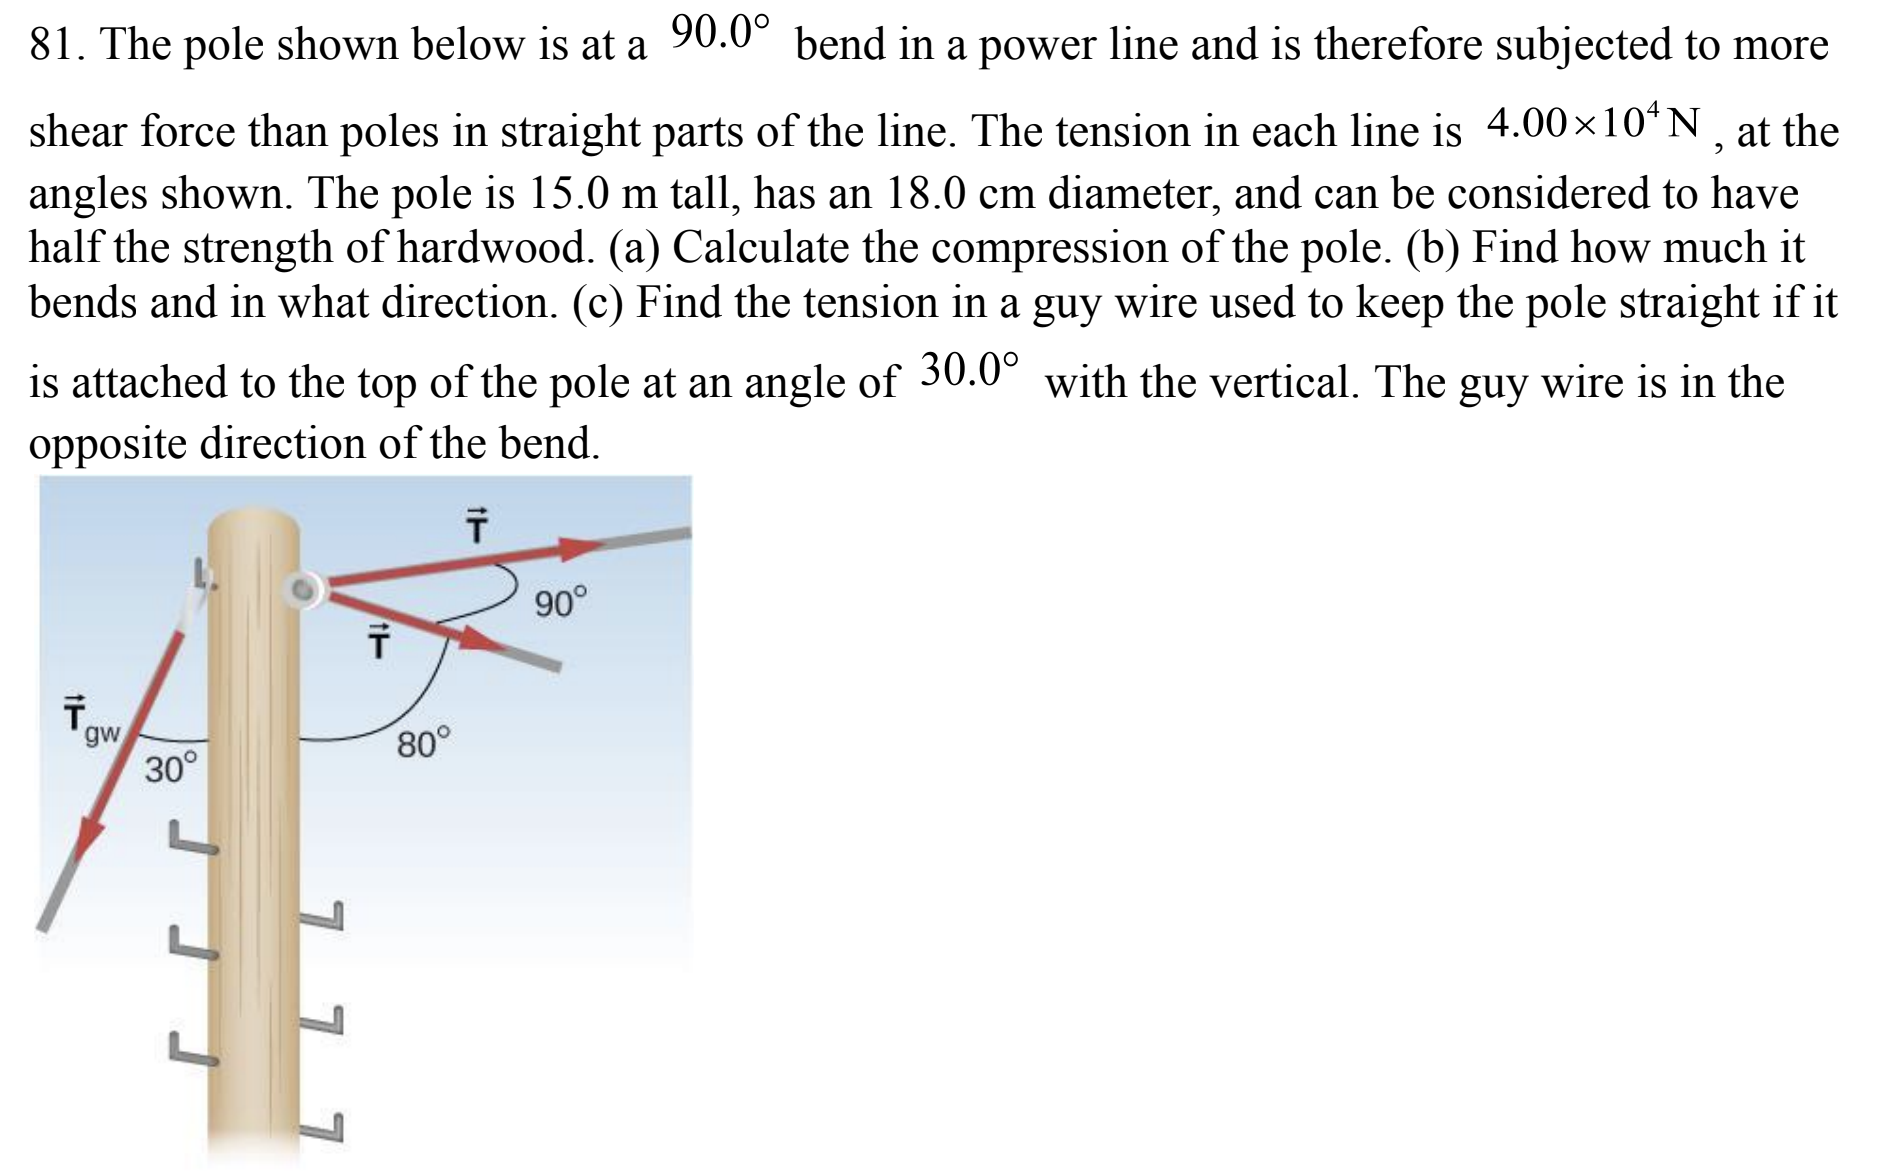

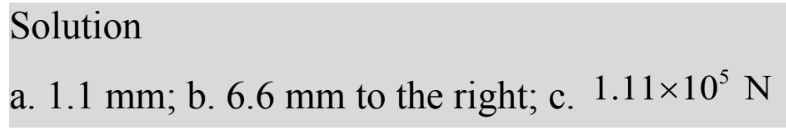

In [90]:
prompt = "Don't solve the question yet. Describe what you observe in the figure AND state your assumptions about the problem"
question_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_12_Static_Equilibrium_and_Elasticity_13/81/q.png"
gemini_prompt_with_image(prompt,question_path)

'Based on the provided image and text, here are my observations and assumptions:\n\n**Observations from the Figure and Text:**\n\n1.  **Subject:** The image depicts the top section of a utility pole with various forces acting on it.\n2.  **Power Lines:** There are two power lines attached to the pole. They create a $90.0^\\circ$ bend relative to each other in the horizontal plane (implied by the text "90.0° bend").\n3.  **Tension Vectors ($\\vec{T}$):**\n    *   Two red arrows labeled $\\vec{T}$ represent the tension from the power lines.\n    *   The magnitude of tension in *each* line is given as $4.00 \\times 10^4 \\text{ N}$.\n    *   The angle between the two tension vectors is labeled as $90^\\circ$.\n    *   These power lines are not perfectly horizontal; the diagram shows them angling slightly downward. Specifically, there is an angle of $80^\\circ$ marked between the vertical pole and the direction of the tension vectors. This implies the lines droop downwards by $10^\\circ$ f

####Chap 6 Q61

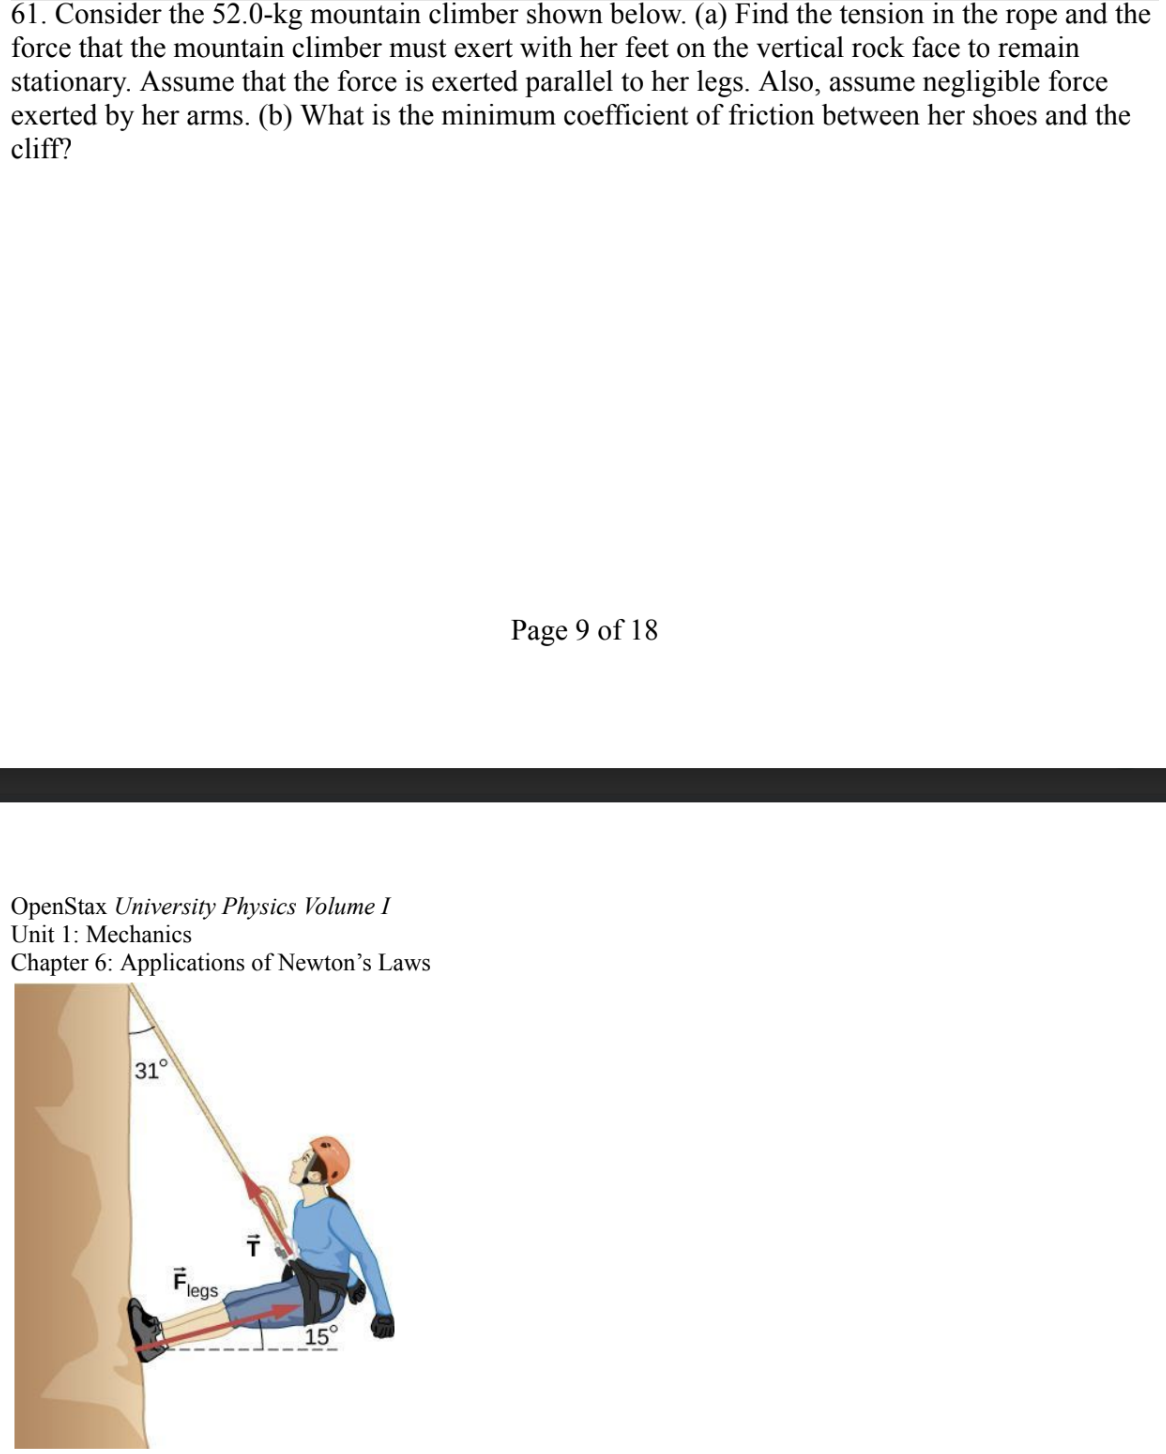

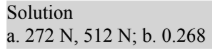

####Ch 6 Q 95

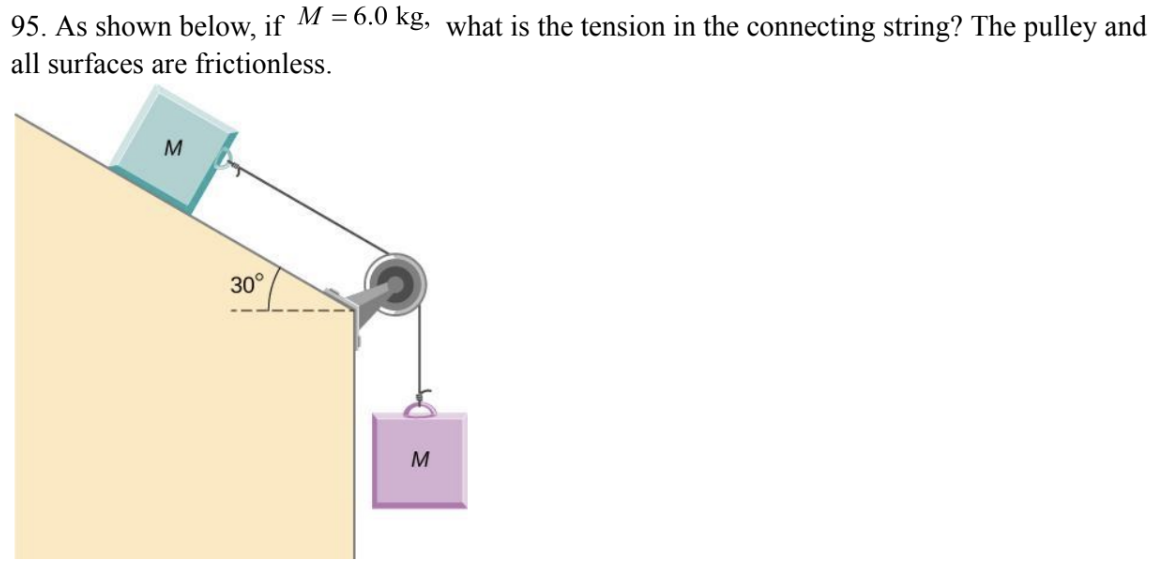

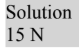

###